In [313]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, ward, average, leaves_list
from scipy.spatial.distance import pdist, squareform

In [355]:

# file_path = '/home/ubuntu/wdir/PopGenStats_Project/data/BifidoIsolates/BLongum/mummer.tsv.gz'
file_path = '/Users/Annaliese/Desktop/PopGenStats_Project/data/BifidoIsolates/BLongum/mummer.tsv'

mummer_matrix = pd.read_csv(file_path, sep='\t', index_col=0)

sample_names = sorted(set(mummer_matrix['s1']) | set(mummer_matrix['s2']))
mapper = {name: f'sample{idx}' for idx, name in enumerate(sample_names)}

mummer_matrix['ss1'] = mummer_matrix['s1'].map(mapper)
mummer_matrix['ss2'] = mummer_matrix['s2'].map(mapper)

mummer_matrix['score1'] = mummer_matrix['avg_identity1'] * (mummer_matrix['prc_aligned1'] / 100)
mummer_matrix['score2'] = mummer_matrix['avg_identity2'] * (mummer_matrix['prc_aligned2'] / 100)

mummer_matrix


,prc_aligned1,prc_aligned2,avg_identity1,avg_identity2,s1,s2,ss1,ss2,score1,score2
0,98.3926,95.0642,99.6903,99.6903,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,sample0,sample1,98.087878,94.769786
1,89.4098,85.5646,98.6762,98.6762,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,sample0,sample2,88.226193,84.431896
2,89.4810,86.9017,98.7474,98.7474,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,sample0,sample3,88.360161,85.813169
3,89.6553,84.5672,98.7345,98.7345,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,sample0,sample4,88.520712,83.497002
4,90.1945,82.0614,98.7558,98.7558,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,sample0,sample5,89.072300,81.040392
...,...,...,...,...,...,...,...,...,...,...
160456,77.7822,73.3819,96.6381,96.6381,wdir/blongum/genomes/ncbi_dataset/data/GCF_925...,wdir/blongum/genomes/ncbi_dataset/data/GCF_934...,sample563,sample565,75.167240,70.914874
160457,84.3246,87.7342,98.6609,98.6609,wdir/blongum/genomes/ncbi_dataset/data/GCF_925...,wdir/blongum/genomes/ncbi_dataset/data/GCF_934...,sample563,sample566,83.195409,86.559351
160458,76.6487,73.2226,96.2964,96.2964,wdir/blongum/genomes/ncbi_dataset/data/GCF_925...,wdir/blongum/genomes/ncbi_dataset/data/GCF_934...,sample564,sample565,73.809939,70.510728
160459,75.2502,79.3385,97.1016,97.1016,wdir/blongum/genomes/ncbi_dataset/data/GCF_925...,wdir/blongum/genomes/ncbi_dataset/data/GCF_934...,sample564,sample566,73.069148,77.038953


In [315]:
diagonal_data = []
for sample in sample_names:
    diagonal_data.append({
        'prc_aligned1': 100,
        'prc_aligned2': 100,
        'avg_identity1': 100,
        'avg_identity2': 100,
        's1': sample,
        's2': sample,
        'ss1': mapper[sample],
        'ss2': mapper[sample],
        'score1': 100,
        'score2': 100
    })

diagonal_df = pd.DataFrame(diagonal_data)
mummer_matrix = pd.concat([mummer_matrix, diagonal_df], ignore_index=True)

mummer_matrix = mummer_matrix.sort_values(by=['s1', 's2']).reset_index(drop=True)

mummer_matrix[['ss1', 'ss2', 'score1', 'score2']]

,ss1,ss2,score1,score2
0,sample0,sample0,100.000000,100.000000
1,sample0,sample1,98.087878,94.769786
2,sample0,sample2,88.226193,84.431896
3,sample0,sample3,88.360161,85.813169
4,sample0,sample4,88.520712,83.497002
...,...,...,...,...
161023,sample564,sample565,73.809939,70.510728
161024,sample564,sample566,73.069148,77.038953
161025,sample565,sample565,100.000000,100.000000
161026,sample565,sample566,70.108008,77.393022


In [316]:

upper_triangle = mummer_matrix.pivot(index='ss1', columns='ss2', values='score1').fillna(0)
upper_triangle = upper_triangle[sorted(upper_triangle.columns)]

lower_triangle = mummer_matrix.pivot(index='ss2', columns='ss1', values='score2').fillna(0)
lower_triangle = lower_triangle[sorted(lower_triangle.columns)]

# lower_triangle

new_mummer_matrix = upper_triangle + lower_triangle
new_mummer_matrix[:] = np.where(new_mummer_matrix==200, 100, new_mummer_matrix)
new_mummer_matrix

# lower_triangle.shape, upper_triangle.shape

ss2,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ss1,,,,,,,,,,,,,,,,,,,,,
sample0,100.000000,98.087878,88.203163,80.242080,91.179871,90.484829,89.588683,92.175049,90.142655,91.537330,...,90.998742,89.753708,89.720319,88.185731,91.994612,90.932009,93.036891,81.464259,89.856901,80.196122
sample1,94.769786,100.000000,86.918832,78.679328,89.585138,88.427648,87.833250,90.317914,88.417367,89.827598,...,89.190980,88.023050,88.347536,86.969942,90.338645,89.506795,91.791948,79.438398,88.078571,78.660824
sample10,76.578904,78.196800,100.000000,71.557116,80.779340,80.718895,81.383627,79.985415,80.939281,81.535457,...,78.720795,78.821804,82.774017,81.733179,82.477155,83.669160,84.165476,71.538882,80.011405,71.539373
sample100,69.539544,70.747370,71.942239,100.000000,74.519538,71.966255,73.977673,72.882877,75.920277,75.397037,...,72.924768,74.079447,75.166384,71.891163,74.785543,74.472376,75.157430,77.763411,72.167874,97.345901
sample101,81.046679,82.517602,83.879907,77.394322,100.000000,85.823291,87.543473,85.789410,88.974414,86.981074,...,85.426042,89.144609,89.389400,87.237554,92.205414,88.600353,89.081398,76.828172,83.916780,77.408454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,79.651038,81.254104,85.003579,75.208207,86.232897,82.790709,85.184413,84.411604,86.278892,85.839027,...,83.173356,82.807693,87.098896,86.787009,86.491025,100.000000,90.614084,74.691904,82.764531,75.216098
sample96,77.999881,79.736934,82.003737,72.593552,82.972948,80.886087,81.027107,81.262061,84.294994,84.506771,...,80.471603,80.094940,83.879860,84.174385,85.252242,86.770056,100.000000,71.353619,78.468646,72.560164
sample97,68.510360,69.177552,70.414132,75.397242,71.955266,71.390156,71.427221,70.753847,73.648505,72.759550,...,72.824939,72.077842,71.711683,72.520756,73.259906,72.756722,72.569017,100.000000,70.134336,75.284239


In [317]:
assert list(lower_triangle.columns) == list(upper_triangle.columns)
assert list(lower_triangle.index) == list(upper_triangle.index)

In [318]:
len(set(mummer_matrix['ss1']) | set(mummer_matrix['ss2']))

567

In [319]:
lower_triangle.head(1)

ss1,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ss2,,,,,,,,,,,,,,,,,,,,,
sample0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [320]:
upper_triangle.head(1)

ss2,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ss1,,,,,,,,,,,,,,,,,,,,,
sample0,100.0,98.087878,88.203163,80.24208,91.179871,90.484829,89.588683,92.175049,90.142655,91.53733,...,90.998742,89.753708,89.720319,88.185731,91.994612,90.932009,93.036891,81.464259,89.856901,80.196122


In [321]:
new_mummer_matrix.head(1)

ss2,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ss1,,,,,,,,,,,,,,,,,,,,,
sample0,100.0,98.087878,88.203163,80.24208,91.179871,90.484829,89.588683,92.175049,90.142655,91.53733,...,90.998742,89.753708,89.720319,88.185731,91.994612,90.932009,93.036891,81.464259,89.856901,80.196122


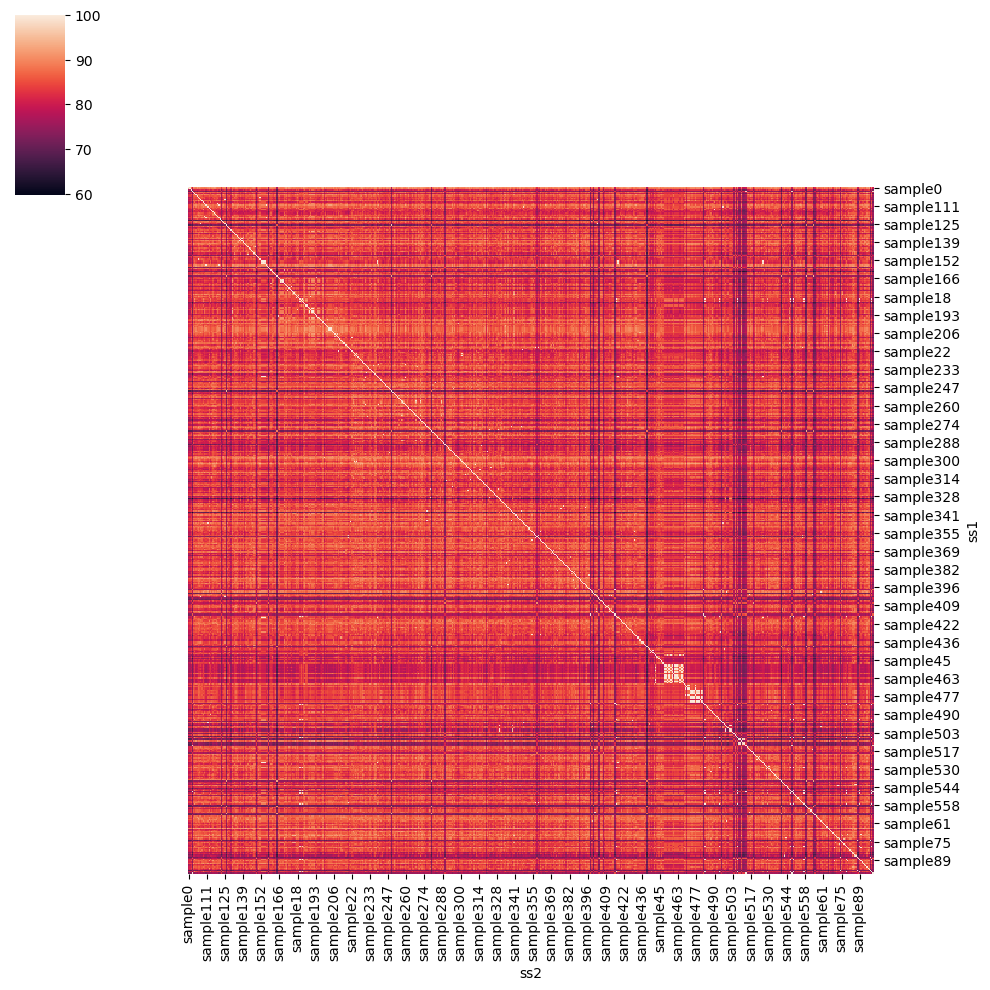

In [322]:
sns.clustermap(new_mummer_matrix, row_cluster=False, col_cluster=False)

In [323]:
new_mummer_matrix
# this is the similarity between the two genomes

ss2,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ss1,,,,,,,,,,,,,,,,,,,,,
sample0,100.000000,98.087878,88.203163,80.242080,91.179871,90.484829,89.588683,92.175049,90.142655,91.537330,...,90.998742,89.753708,89.720319,88.185731,91.994612,90.932009,93.036891,81.464259,89.856901,80.196122
sample1,94.769786,100.000000,86.918832,78.679328,89.585138,88.427648,87.833250,90.317914,88.417367,89.827598,...,89.190980,88.023050,88.347536,86.969942,90.338645,89.506795,91.791948,79.438398,88.078571,78.660824
sample10,76.578904,78.196800,100.000000,71.557116,80.779340,80.718895,81.383627,79.985415,80.939281,81.535457,...,78.720795,78.821804,82.774017,81.733179,82.477155,83.669160,84.165476,71.538882,80.011405,71.539373
sample100,69.539544,70.747370,71.942239,100.000000,74.519538,71.966255,73.977673,72.882877,75.920277,75.397037,...,72.924768,74.079447,75.166384,71.891163,74.785543,74.472376,75.157430,77.763411,72.167874,97.345901
sample101,81.046679,82.517602,83.879907,77.394322,100.000000,85.823291,87.543473,85.789410,88.974414,86.981074,...,85.426042,89.144609,89.389400,87.237554,92.205414,88.600353,89.081398,76.828172,83.916780,77.408454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,79.651038,81.254104,85.003579,75.208207,86.232897,82.790709,85.184413,84.411604,86.278892,85.839027,...,83.173356,82.807693,87.098896,86.787009,86.491025,100.000000,90.614084,74.691904,82.764531,75.216098
sample96,77.999881,79.736934,82.003737,72.593552,82.972948,80.886087,81.027107,81.262061,84.294994,84.506771,...,80.471603,80.094940,83.879860,84.174385,85.252242,86.770056,100.000000,71.353619,78.468646,72.560164
sample97,68.510360,69.177552,70.414132,75.397242,71.955266,71.390156,71.427221,70.753847,73.648505,72.759550,...,72.824939,72.077842,71.711683,72.520756,73.259906,72.756722,72.569017,100.000000,70.134336,75.284239


In [324]:
distance_matrix = 100 - new_mummer_matrix
distance_matrix
# this is the pairwise divergence between genomes

ss2,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ss1,,,,,,,,,,,,,,,,,,,,,
sample0,0.000000,1.912122,11.796837,19.757920,8.820129,9.515171,10.411317,7.824951,9.857345,8.462670,...,9.001258,10.246292,10.279681,11.814269,8.005388,9.067991,6.963109,18.535741,10.143099,19.803878
sample1,5.230214,0.000000,13.081168,21.320672,10.414862,11.572352,12.166750,9.682086,11.582633,10.172402,...,10.809020,11.976950,11.652464,13.030058,9.661355,10.493205,8.208052,20.561602,11.921429,21.339176
sample10,23.421096,21.803200,0.000000,28.442884,19.220660,19.281105,18.616373,20.014585,19.060719,18.464543,...,21.279205,21.178196,17.225983,18.266821,17.522845,16.330840,15.834524,28.461118,19.988595,28.460627
sample100,30.460456,29.252630,28.057761,0.000000,25.480462,28.033745,26.022327,27.117123,24.079723,24.602963,...,27.075232,25.920553,24.833616,28.108837,25.214457,25.527624,24.842570,22.236589,27.832126,2.654099
sample101,18.953321,17.482398,16.120093,22.605678,0.000000,14.176709,12.456527,14.210590,11.025586,13.018926,...,14.573958,10.855391,10.610600,12.762446,7.794586,11.399647,10.918602,23.171828,16.083220,22.591546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,20.348962,18.745896,14.996421,24.791793,13.767103,17.209291,14.815587,15.588396,13.721108,14.160973,...,16.826644,17.192307,12.901104,13.212991,13.508975,0.000000,9.385916,25.308096,17.235469,24.783902
sample96,22.000119,20.263066,17.996263,27.406448,17.027052,19.113913,18.972893,18.737939,15.705006,15.493229,...,19.528397,19.905060,16.120140,15.825615,14.747758,13.229944,0.000000,28.646381,21.531354,27.439836
sample97,31.489640,30.822448,29.585868,24.602758,28.044734,28.609844,28.572779,29.246153,26.351495,27.240450,...,27.175061,27.922158,28.288317,27.479244,26.740094,27.243278,27.430983,0.000000,29.865664,24.715761


In [325]:
np.set_printoptions(suppress=True)
# avoid acientific notation for linkage matrices

HIERARCHICAL WARD LINKAGE

In [326]:
ward_linkage_matrix = ward(new_mummer_matrix)
ward_linkage_matrix

array([[ 418.      ,  420.      ,    0.33247 ,    2.      ],
       [ 395.      ,  397.      ,    0.349377,    2.      ],
       [ 422.      ,  567.      ,    0.466659,    3.      ],
       ...,
       [1127.      , 1128.      , 1032.128688,  311.      ],
       [1129.      , 1130.      , 1625.624439,  525.      ],
       [1126.      , 1131.      , 2116.438836,  567.      ]])

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [75.0, 75.0, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [170.0, 170.0, 193.75, 193.75],
  [133.75, 133.75, 181.875, 181.875],
  [84.375, 84.375, 157.8125, 157.8125],
  [33.125, 33.125, 121.09375, 121.09375],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [233.75, 233.75, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],


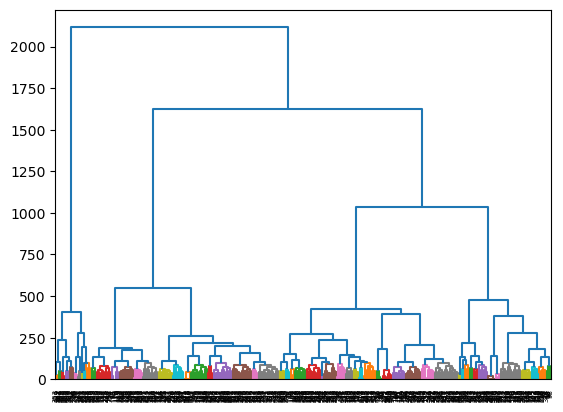

In [327]:
# t = 0.7*max(ward_linkage_matrix[:,2])

ward_dendrogram = dendrogram(ward_linkage_matrix, color_threshold=99)
ward_dendrogram

In [328]:
ward_sample_order = leaves_list(ward_linkage_matrix) # pretty sure this is the wrong parameter
ward_ordered_sample_names = [new_mummer_matrix.index[i] for i in ward_sample_order]
ward_ordered_sample_names

['sample416',
 'sample482',
 'sample398',
 'sample415',
 'sample407',
 'sample519',
 'sample88',
 'sample511',
 'sample510',
 'sample512',
 'sample508',
 'sample509',
 'sample100',
 'sample513',
 'sample548',
 'sample99',
 'sample403',
 'sample496',
 'sample358',
 'sample504',
 'sample149',
 'sample158',
 'sample44',
 'sample164',
 'sample54',
 'sample564',
 'sample126',
 'sample25',
 'sample28',
 'sample559',
 'sample33',
 'sample34',
 'sample506',
 'sample29',
 'sample404',
 'sample122',
 'sample87',
 'sample74',
 'sample97',
 'sample565',
 'sample40',
 'sample558',
 'sample65',
 'sample39',
 'sample539',
 'sample0',
 'sample303',
 'sample37',
 'sample57',
 'sample422',
 'sample363',
 'sample59',
 'sample198',
 'sample235',
 'sample1',
 'sample14',
 'sample2',
 'sample3',
 'sample31',
 'sample52',
 'sample230',
 'sample236',
 'sample157',
 'sample30',
 'sample120',
 'sample110',
 'sample111',
 'sample156',
 'sample204',
 'sample202',
 'sample203',
 'sample103',
 'sample205',
 'sample

In [329]:
ward_clusters_99 = fcluster(ward_linkage_matrix, 99, criterion='distance')
num_ward_clusters_99 = len(set(ward_clusters_99))
num_ward_clusters_99

56

In [330]:
ward_sample_clusters = dict(zip(ward_ordered_sample_names, ward_clusters_99))
ward_sample_clusters

# the clusters should be in order??

{'sample416': np.int32(11),
 'sample482': np.int32(12),
 'sample398': np.int32(52),
 'sample415': np.int32(4),
 'sample407': np.int32(25),
 'sample519': np.int32(47),
 'sample88': np.int32(13),
 'sample511': np.int32(25),
 'sample510': np.int32(36),
 'sample512': np.int32(37),
 'sample508': np.int32(33),
 'sample509': np.int32(25),
 'sample100': np.int32(56),
 'sample513': np.int32(42),
 'sample548': np.int32(13),
 'sample99': np.int32(13),
 'sample403': np.int32(18),
 'sample496': np.int32(22),
 'sample358': np.int32(56),
 'sample504': np.int32(33),
 'sample149': np.int32(52),
 'sample158': np.int32(33),
 'sample44': np.int32(33),
 'sample164': np.int32(23),
 'sample54': np.int32(42),
 'sample564': np.int32(13),
 'sample126': np.int32(29),
 'sample25': np.int32(10),
 'sample28': np.int32(14),
 'sample559': np.int32(17),
 'sample33': np.int32(33),
 'sample34': np.int32(7),
 'sample506': np.int32(20),
 'sample29': np.int32(52),
 'sample404': np.int32(35),
 'sample122': np.int32(18),
 's

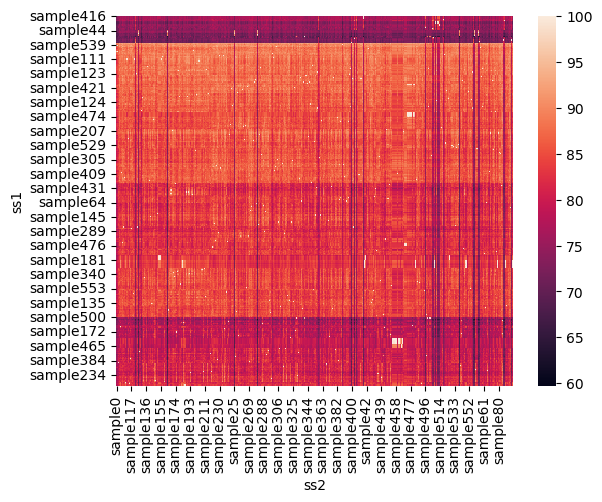

In [331]:
# this is missing the information for the second axis
# also need to translate clusters onto this map instead of having a gradient
reordered_ward_matrix = new_mummer_matrix.loc[ward_ordered_sample_names]
sns.heatmap(reordered_ward_matrix)
plt.show()

In [332]:
ward_clusters_95 = fcluster(ward_linkage_matrix, 95, criterion='distance')
num_ward_clusters_95 = len(set(ward_clusters_95))
num_ward_clusters_95

61

In [333]:
ward_t = 0.99*max(ward_linkage_matrix[:,2])

ward_clusters_t = fcluster(ward_linkage_matrix, ward_t, criterion='distance')
num_ward_clusters_t = len(set(ward_clusters_t))
num_ward_clusters_t

2

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [75.0, 75.0, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [170.0, 170.0, 193.75, 193.75],
  [133.75, 133.75, 181.875, 181.875],
  [84.375, 84.375, 157.8125, 157.8125],
  [33.125, 33.125, 121.09375, 121.09375],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [233.75, 233.75, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],


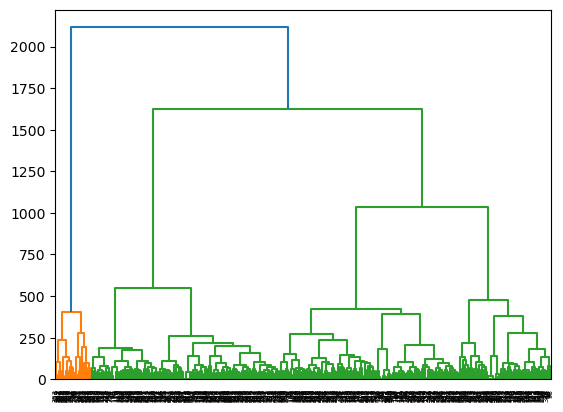

In [334]:
ward_dendrogram_t = dendrogram(ward_linkage_matrix, color_threshold=ward_t)
ward_dendrogram_t

HIERARCHICAL AVERAGE LINKAGE

In [335]:
avg_linkage_matrix = average(distance_matrix)
avg_linkage_matrix

array([[ 418.      ,  420.      ,    0.33247 ,    2.      ],
       [ 395.      ,  397.      ,    0.349377,    2.      ],
       [ 422.      ,  567.      ,    0.433297,    3.      ],
       ...,
       [1124.      , 1129.      ,  157.678946,   90.      ],
       [1059.      , 1126.      ,  159.95856 ,  477.      ],
       [1130.      , 1131.      ,  210.099992,  567.      ]])

Each row in the matrix is an iteration of clustering.

The first two columns indicate which clusters are being merged at each step.

The third column is the distance between these clusters before merging.

    Here, "distance" is derived from score1 or score2 (with higher similarity reflecting lower distance).
    
The fourth column is how many original samples are in the new cluster after merging.

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [23.75, 23.75, 77.5, 77.5],
  [5.0, 5.0, 50.625, 50.625],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [192.5, 192.5, 220.0, 220.0],
  [175.0, 175.0, 206.25, 206.25],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [190.625, 190.625, 250.0, 250.0],
  [152.5, 152.5, 220.3125, 220.3125],
  [122.5, 122.5, 186.40625, 186.40625],
  [27.8125, 27.8125, 154.453125, 154.453125],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.

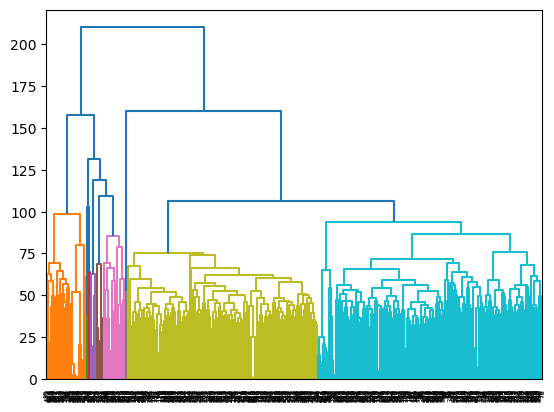

In [336]:
avg_dendrogram_99 = dendrogram(avg_linkage_matrix, color_threshold=99)
avg_dendrogram_99
# will have to reverse map to know which samples these are from the original data

In [359]:
avg_sample_order = leaves_list(avg_linkage_matrix)
avg_sample_order

array([ 95, 449, 447, 444, 448, 387, 154, 389, 208, 243, 502, 431, 255,
       321, 551, 160, 192, 549, 391, 493, 552, 174, 304,  82,  85,  38,
       248, 403, 395, 397, 394, 400, 404, 402, 398, 408, 396, 409, 399,
       407, 386, 406, 423, 435,   5, 383, 257, 268,  69, 496, 353, 426,
       332, 352, 343, 467, 554, 379,  73, 490, 517,  31, 168, 201, 511,
       288, 451,  56,  66, 459, 458, 460, 455, 456,   3, 461, 499, 566,
       339, 441,  27, 553, 539, 564, 518, 335, 510, 453, 212, 340, 529,
         0, 228, 479, 410, 545, 534, 556, 294, 110, 152,   1,  46, 301,
       522, 323, 489, 112, 223, 235, 468, 132, 508,  88, 535, 109, 222,
        42,  44, 205, 334,  65, 224, 147, 153,  25,  14,  15,  64, 118,
       116, 117,   6, 119, 520, 128, 129, 360, 254, 359, 164, 180, 273,
       280, 558, 438, 532, 167, 187, 327, 507, 120, 173, 471, 503, 270,
       271, 198, 494, 537, 521,  72, 337, 350, 405, 282,  35, 287, 289,
       165, 445, 523,  67, 541,  16, 277, 442,  28, 333, 281, 26

In [360]:
index_to_sample_name = {index: name for index, name in enumerate(sorted(mapper.values()))}
# creates a list like this: [(0: 'sample0'), (1: 'sample1'), ...]

avg_sample_order = [index_to_sample_name[idx] for idx in avg_sample_order]
avg_sample_order

['sample184',
 'sample502',
 'sample500',
 'sample499',
 'sample501',
 'sample447',
 'sample237',
 'sample449',
 'sample286',
 'sample317',
 'sample550',
 'sample487',
 'sample328',
 'sample388',
 'sample85',
 'sample242',
 'sample271',
 'sample83',
 'sample450',
 'sample542',
 'sample86',
 'sample255',
 'sample372',
 'sample172',
 'sample175',
 'sample132',
 'sample321',
 'sample461',
 'sample454',
 'sample456',
 'sample453',
 'sample459',
 'sample462',
 'sample460',
 'sample457',
 'sample466',
 'sample455',
 'sample467',
 'sample458',
 'sample465',
 'sample446',
 'sample464',
 'sample48',
 'sample490',
 'sample102',
 'sample443',
 'sample33',
 'sample34',
 'sample160',
 'sample545',
 'sample416',
 'sample482',
 'sample398',
 'sample415',
 'sample407',
 'sample519',
 'sample88',
 'sample44',
 'sample164',
 'sample54',
 'sample564',
 'sample126',
 'sample25',
 'sample28',
 'sample559',
 'sample358',
 'sample504',
 'sample149',
 'sample158',
 'sample511',
 'sample510',
 'sample512',
 's

In [361]:
avg_clusters_99 = fcluster(avg_linkage_matrix, 99, criterion='distance')
num_avg_clusters_99 = len(set(avg_clusters_99))
num_avg_clusters_99

9

In [395]:
avg_sample_clustering_t = dict(zip(avg_sample_order, avg_clusters_t))
avg_sample_clustering_t

{'sample184': np.int32(2),
 'sample502': np.int32(2),
 'sample500': np.int32(2),
 'sample499': np.int32(1),
 'sample501': np.int32(2),
 'sample447': np.int32(1),
 'sample237': np.int32(2),
 'sample449': np.int32(2),
 'sample286': np.int32(2),
 'sample317': np.int32(2),
 'sample550': np.int32(2),
 'sample487': np.int32(2),
 'sample328': np.int32(2),
 'sample388': np.int32(2),
 'sample85': np.int32(2),
 'sample242': np.int32(2),
 'sample271': np.int32(2),
 'sample83': np.int32(2),
 'sample450': np.int32(2),
 'sample542': np.int32(2),
 'sample86': np.int32(2),
 'sample255': np.int32(2),
 'sample372': np.int32(2),
 'sample172': np.int32(2),
 'sample175': np.int32(2),
 'sample132': np.int32(2),
 'sample321': np.int32(2),
 'sample461': np.int32(1),
 'sample454': np.int32(2),
 'sample456': np.int32(2),
 'sample453': np.int32(2),
 'sample459': np.int32(1),
 'sample462': np.int32(2),
 'sample460': np.int32(2),
 'sample457': np.int32(2),
 'sample466': np.int32(2),
 'sample455': np.int32(2),
 'sa

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [23.75, 23.75, 77.5, 77.5],
  [5.0, 5.0, 50.625, 50.625],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [192.5, 192.5, 220.0, 220.0],
  [175.0, 175.0, 206.25, 206.25],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [190.625, 190.625, 250.0, 250.0],
  [152.5, 152.5, 220.3125, 220.3125],
  [122.5, 122.5, 186.40625, 186.40625],
  [27.8125, 27.8125, 154.453125, 154.453125],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.

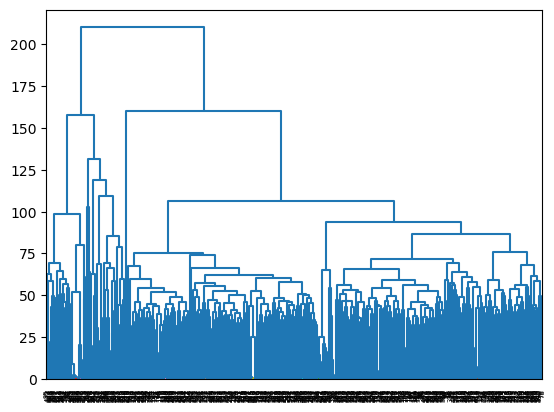

In [364]:
avg_dendrogram_1 = dendrogram(avg_linkage_matrix, color_threshold=1)
avg_dendrogram_1

In [365]:
avg_clusters_1 = fcluster(avg_linkage_matrix, 1, criterion='distance')
num_avg_clusters_1 = len(set(avg_clusters_1))
num_avg_clusters_1

549

In [384]:
avg_sample_clustering_1 = dict(zip(avg_sample_order, avg_clusters_1))
avg_sample_clustering_1

{'sample184': np.int32(85),
 'sample502': np.int32(95),
 'sample500': np.int32(513),
 'sample499': np.int32(71),
 'sample501': np.int32(173),
 'sample447': np.int32(37),
 'sample237': np.int32(125),
 'sample449': np.int32(195),
 'sample286': np.int32(477),
 'sample317': np.int32(374),
 'sample550': np.int32(446),
 'sample487': np.int32(178),
 'sample328': np.int32(442),
 'sample388': np.int32(363),
 'sample85': np.int32(121),
 'sample242': np.int32(119),
 'sample271': np.int32(167),
 'sample83': np.int32(288),
 'sample450': np.int32(443),
 'sample542': np.int32(453),
 'sample86': np.int32(529),
 'sample255': np.int32(447),
 'sample372': np.int32(448),
 'sample172': np.int32(258),
 'sample175': np.int32(364),
 'sample132': np.int32(122),
 'sample321': np.int32(438),
 'sample461': np.int32(84),
 'sample454': np.int32(168),
 'sample456': np.int32(207),
 'sample453': np.int32(444),
 'sample459': np.int32(56),
 'sample462': np.int32(244),
 'sample460': np.int32(524),
 'sample457': np.int32(

t = 1 is the correct threshold value for 1% divergence within clusters. The fact that it produces so many clusters proves that hierarchical clustering is pretty ineffective for strain clustering. Need to find a better method!

In [367]:
avg_clusters_95 = fcluster(avg_linkage_matrix, 95, criterion='distance')
num_avg_clusters_95 = len(set(avg_clusters_95))
num_avg_clusters_95

10

In [368]:
avg_t = 0.99*max(avg_linkage_matrix[:,2]) # see documentation for scipy.dendrogram

avg_clusters_t = fcluster(avg_linkage_matrix, avg_t, criterion='distance')
num_avg_clusters_t = len(set(avg_clusters_t))
num_avg_clusters_t

2

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [23.75, 23.75, 77.5, 77.5],
  [5.0, 5.0, 50.625, 50.625],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [192.5, 192.5, 220.0, 220.0],
  [175.0, 175.0, 206.25, 206.25],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [190.625, 190.625, 250.0, 250.0],
  [152.5, 152.5, 220.3125, 220.3125],
  [122.5, 122.5, 186.40625, 186.40625],
  [27.8125, 27.8125, 154.453125, 154.453125],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.

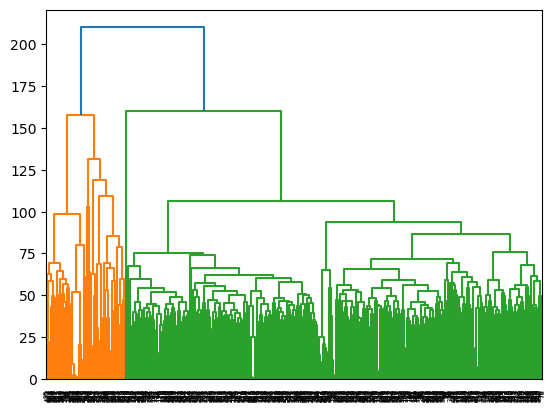

In [369]:
avg_dendrogram_t = dendrogram(avg_linkage_matrix, color_threshold=avg_t)
avg_dendrogram_t

COMPARING CLUSTERING METHODS

In [370]:
cluster_counts = {}
cluster_counts["Avg, t=99"] = num_avg_clusters_99
cluster_counts["Avg, t=95"] = num_avg_clusters_95
cluster_counts["Avg, t=1"] = num_avg_clusters_1
cluster_counts["Avg, t"] = num_avg_clusters_t
cluster_counts["Ward, t=99"] = num_ward_clusters_99
cluster_counts["Ward, t=95"] = num_ward_clusters_95
cluster_counts["Ward, t"] = num_ward_clusters_t
cluster_counts

{'Avg, t=99': 9,
 'Avg, t=95': 10,
 'Avg, t=1': 549,
 'Avg, t': 2,
 'Ward, t=99': 56,
 'Ward, t=95': 61,
 'Ward, t': 2}

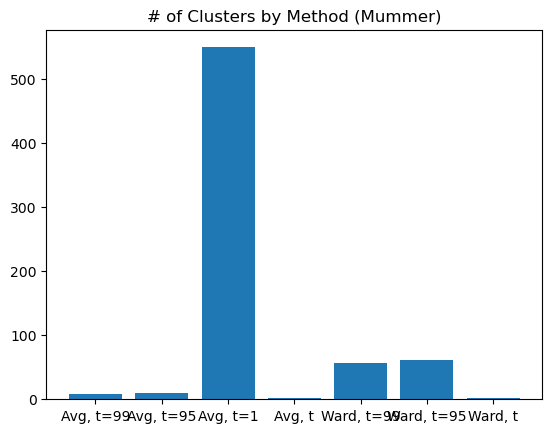

In [347]:
plt.bar(cluster_counts.keys(), cluster_counts.values())
plt.title("# of Clusters by Method (Mummer)")
plt.show()

In [348]:
# start intra-specific divergence box plot

# make DataFrame plotting SKANI/mummer/ParSNPs data against clusters/thresholds
# values will be within-cluster divergence
#   --> calculate the average of the distances between each pair of points in the cluster
# (for now it'll be just mummer)

In [398]:
print("Sample Names:", sorted(mapper.values()))
print("Avg Samples Per Cluster:", avg_samples_per_cluster)

Sample Names: ['sample0', 'sample1', 'sample10', 'sample100', 'sample101', 'sample102', 'sample103', 'sample104', 'sample105', 'sample106', 'sample107', 'sample108', 'sample109', 'sample11', 'sample110', 'sample111', 'sample112', 'sample113', 'sample114', 'sample115', 'sample116', 'sample117', 'sample118', 'sample119', 'sample12', 'sample120', 'sample121', 'sample122', 'sample123', 'sample124', 'sample125', 'sample126', 'sample127', 'sample128', 'sample129', 'sample13', 'sample130', 'sample131', 'sample132', 'sample133', 'sample134', 'sample135', 'sample136', 'sample137', 'sample138', 'sample139', 'sample14', 'sample140', 'sample141', 'sample142', 'sample143', 'sample144', 'sample145', 'sample146', 'sample147', 'sample148', 'sample149', 'sample15', 'sample150', 'sample151', 'sample152', 'sample153', 'sample154', 'sample155', 'sample156', 'sample157', 'sample158', 'sample159', 'sample16', 'sample160', 'sample161', 'sample162', 'sample163', 'sample164', 'sample165', 'sample166', 'sample1

In [399]:
# https://stackoverflow.com/questions/54249400/python-how-to-group-keys-that-have-the-same-values-in-a-dictionary

avg_cluster_labels = set(avg_sample_clustering_1.values())

avg_samples_per_cluster = {}
for n in avg_cluster_labels:
    avg_samples_per_cluster[n] = [k for k in avg_sample_clustering_1.keys() if avg_sample_clustering_1[k] == n]

avg_samples_per_cluster

{np.int32(1): ['sample553', 'sample121'],
 np.int32(2): ['sample43'],
 np.int32(3): ['sample364'],
 np.int32(4): ['sample551'],
 np.int32(5): ['sample541'],
 np.int32(6): ['sample35'],
 np.int32(7): ['sample241'],
 np.int32(8): ['sample142'],
 np.int32(9): ['sample47'],
 np.int32(10): ['sample8'],
 np.int32(11): ['sample127'],
 np.int32(12): ['sample557'],
 np.int32(13): ['sample139'],
 np.int32(14): ['sample58'],
 np.int32(15): ['sample410'],
 np.int32(16): ['sample185'],
 np.int32(17): ['sample476'],
 np.int32(18): ['sample251'],
 np.int32(19): ['sample106'],
 np.int32(20): ['sample112'],
 np.int32(21): ['sample505'],
 np.int32(22): ['sample291'],
 np.int32(23): ['sample74'],
 np.int32(24): ['sample40'],
 np.int32(25): ['sample458'],
 np.int32(26): ['sample261'],
 np.int32(27): ['sample428', 'sample165'],
 np.int32(28): ['sample337'],
 np.int32(29): ['sample194', 'sample63', 'sample376', 'sample130'],
 np.int32(30): ['sample309'],
 np.int32(31): ['sample424'],
 np.int32(32): ['sample

In [386]:
def get_pairwise_distance(sample1, sample2, distance_matrix):
    index1 = sorted(mapper.values()).index(sample1)
    index2 = sorted(mapper.values()).index(sample2)
    dist = distance_matrix[index1, index2]
    return dist

In [416]:
def get_pairwise_distances_within_cluster(cluster_samples, distance_matrix):
    distances = []

    if len(cluster_samples) == 1:
        distances.append(0)
    else:
        for i in range(len(cluster_samples)):
            for j in range(i + 1, len(cluster_samples)):
                sample1 = cluster_samples[i]
                sample2 = cluster_samples[j]
                distances.append(get_pairwise_distance(sample1, sample2, distance_matrix))

    return distances

In [417]:
all_distances = []

for cluster_id, cluster_samples in avg_samples_per_cluster.items():
    print(f"Cluster ID: {cluster_id}, Samples: {cluster_samples}")

    distances = get_pairwise_distances_within_cluster(cluster_samples, distance_matrix.values)

    for distance in distances:
        all_distances.append({'cluster': cluster_id, 'distance': distance})

# print (all_distances)

Cluster ID: 1, Samples: ['sample553', 'sample121']
Cluster ID: 2, Samples: ['sample43']
Cluster ID: 3, Samples: ['sample364']
Cluster ID: 4, Samples: ['sample551']
Cluster ID: 5, Samples: ['sample541']
Cluster ID: 6, Samples: ['sample35']
Cluster ID: 7, Samples: ['sample241']
Cluster ID: 8, Samples: ['sample142']
Cluster ID: 9, Samples: ['sample47']
Cluster ID: 10, Samples: ['sample8']
Cluster ID: 11, Samples: ['sample127']
Cluster ID: 12, Samples: ['sample557']
Cluster ID: 13, Samples: ['sample139']
Cluster ID: 14, Samples: ['sample58']
Cluster ID: 15, Samples: ['sample410']
Cluster ID: 16, Samples: ['sample185']
Cluster ID: 17, Samples: ['sample476']
Cluster ID: 18, Samples: ['sample251']
Cluster ID: 19, Samples: ['sample106']
Cluster ID: 20, Samples: ['sample112']
Cluster ID: 21, Samples: ['sample505']
Cluster ID: 22, Samples: ['sample291']
Cluster ID: 23, Samples: ['sample74']
Cluster ID: 24, Samples: ['sample40']
Cluster ID: 25, Samples: ['sample458']
Cluster ID: 26, Samples: ['sa

In [418]:
distances_df = pd.DataFrame(all_distances)
distances_df

,cluster,distance
0,1,13.098312
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
...,...,...
554,545,0.000000
555,546,0.000000
556,547,0.000000
557,548,0.000000


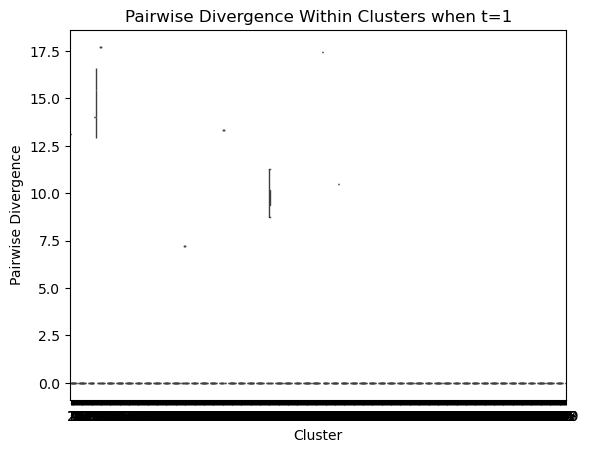

In [419]:
sns.boxplot(x='cluster', y='distance', data=distances_df)
plt.xlabel('Cluster')
plt.ylabel('Pairwise Divergence')
plt.title('Pairwise Divergence Within Clusters when t=1')
plt.show()

^Pairwise divergences within each cluster.

Visualization of the distribution of divergences among samples within each cluster.

In [ ]:
# start inter-specific divergence box plot